In [487]:
#### https://www.alphavantage.co/support/#api-key
#### key: IF0CUQWZ1G8ET17H
#### Pkey: 909JQZPDRVCU1N43
AVantageKEY = '909JQZPDRVCU1N43'
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import time
import quandl
quandl.ApiConfig.api_key = 'j5_NSxSrJ3gxzSqWKNUC'
import urllib#.request, urllib.error, urllib.parse
import urllib.request

import itertools
import datapackage
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 6.0)

In [410]:
#https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv


In [439]:
# method for getting last price
ts = TimeSeries(key=AVantageKEY, output_format='pandas')
def get_current_stock_price(symbol):
    '''
        this method returns last stock price for a given symbol
    '''
    output = -1
    try:
        data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='compact')
        output = data["5. adjusted close"].tail(1).values[0]
    except Exception as e:
        s = "Failed to download:n{0}".format(e);
        print(s)
    
    #pprint(output)
    #pprint(meta_data)
    return output

get_current_stock_price("DISCK")

25.785

In [413]:


data_url = 'https://datahub.io/core/s-and-p-500-companies-financials/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

    Symbol                                 Name                  Sector
0      MMM                           3M Company             Industrials
1      AOS                      A.O. Smith Corp             Industrials
2      ABT                  Abbott Laboratories             Health Care
3     ABBV                          AbbVie Inc.             Health Care
4      ACN                        Accenture plc  Information Technology
5     ATVI                  Activision Blizzard  Information Technology
6      AYI                    Acuity Brands Inc             Industrials
7     ADBE                    Adobe Systems Inc  Information Technology
8      AAP                   Advance Auto Parts  Consumer Discretionary
9      AMD           Advanced Micro Devices Inc  Information Technology
10     AES                             AES Corp               Utilities
11     AET                            Aetna Inc             Health Care
12     AMG        Affiliated Managers Group Inc              Fin

    Symbol                                 Name                  Sector
0      MMM                           3M Company             Industrials
1      AOS                      A.O. Smith Corp             Industrials
2      ABT                  Abbott Laboratories             Health Care
3     ABBV                          AbbVie Inc.             Health Care
4      ACN                        Accenture plc  Information Technology
5     ATVI                  Activision Blizzard  Information Technology
6      AYI                    Acuity Brands Inc             Industrials
7     ADBE                    Adobe Systems Inc  Information Technology
8      AAP                   Advance Auto Parts  Consumer Discretionary
9      AMD           Advanced Micro Devices Inc  Information Technology
10     AES                             AES Corp               Utilities
11     AET                            Aetna Inc             Health Care
12     AMG        Affiliated Managers Group Inc              Fin

In [414]:
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.4900,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.9250,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.2800,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.0500,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.8200,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.9300,52518668144,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.0000,6242377704,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.4510,94550214268,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.8100,8123611867,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.7000,11191663795,3.390000e+08,2.109196,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [5]:
data.count()

Symbol            505
Name              505
Sector            505
Price             505
Price/Earnings    503
Dividend Yield    505
Earnings/Share    505
52 Week Low       505
52 Week High      505
Market Cap        505
EBITDA            505
Price/Sales       505
Price/Book        497
SEC Filings       505
dtype: int64

In [19]:
df_sector_mean = data.groupby('Sector').median()#.index
df_sector_mean

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Sector,,,,,,,,,,
Consumer Discretionary,65.140,18.770,1.476855,3.420,77.9000,50.11000,1.434277e+10,1.962094e+09,1.827565,3.970
Consumer Staples,69.750,20.485,2.416417,3.505,84.3250,65.04000,3.077178e+10,3.011012e+09,2.507078,6.280
Energy,50.325,25.720,1.877645,-1.140,61.3375,41.06000,2.200518e+10,2.407000e+09,3.026859,2.190
Financials,71.105,16.300,1.930323,3.485,81.3150,58.39505,2.662220e+10,0.000000e+00,2.876552,1.600
Health Care,96.420,19.925,0.587927,2.940,125.8600,78.97000,3.229520e+10,1.676204e+09,4.055685,3.850
Industrials,87.600,21.600,1.472651,4.800,100.1800,69.55000,1.936306e+10,1.635916e+09,2.156061,4.460
Information Technology,84.770,25.165,1.087073,2.155,98.7750,71.65500,2.693714e+10,1.667542e+09,4.728857,5.845
Materials,105.180,23.260,1.577149,4.140,121.9500,78.01000,1.696416e+10,2.152000e+09,2.527608,3.660
Real Estate,58.360,16.550,3.714936,1.770,78.1700,56.66000,1.439472e+10,1.260662e+09,10.251216,2.320


In [11]:
sectors = df_sector_mean.index
sectors

Index(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Telecommunication Services', 'Utilities'],
      dtype='object', name='Sector')

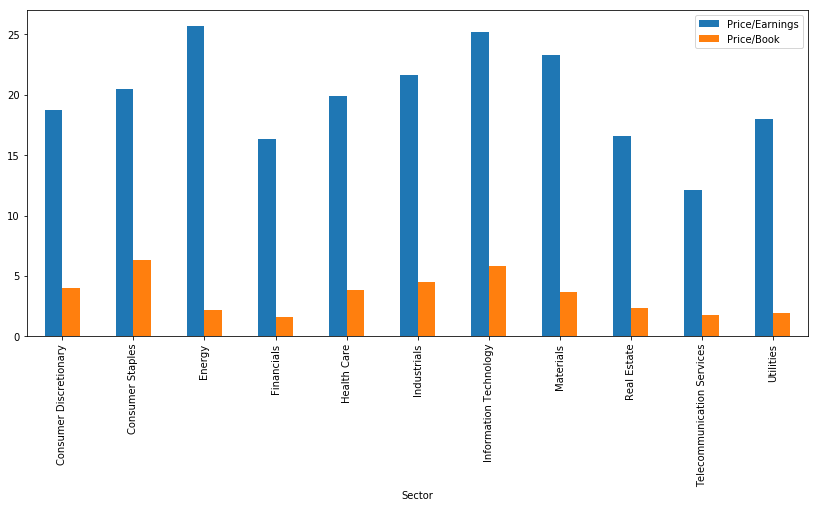

In [52]:
df_sector_mean[["Price/Earnings","Price/Book"]].plot(kind="bar")

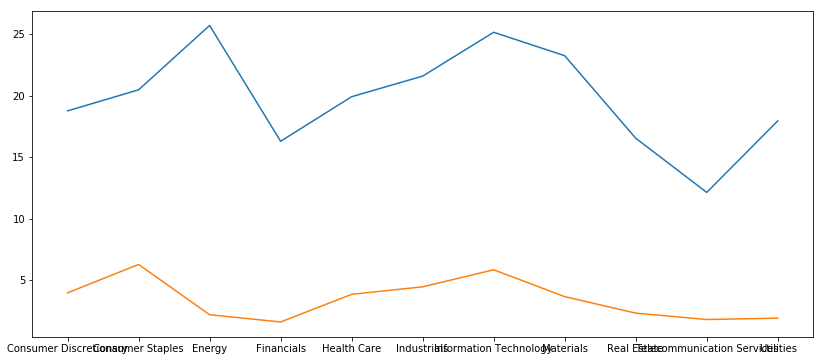

In [53]:
plt.plot(df_sector_mean[["Price/Earnings","Price/Book"]])

In [18]:
for sector in sectors:
    print(sector)
    print(data[data["Sector"] == sector].shape)

Consumer Discretionary
(84, 14)
Consumer Staples
(34, 14)
Energy
(32, 14)
Financials
(68, 14)
Health Care
(61, 14)
Industrials
(67, 14)
Information Technology
(70, 14)
Materials
(25, 14)
Real Estate
(33, 14)
Telecommunication Services
(3, 14)
Utilities
(28, 14)


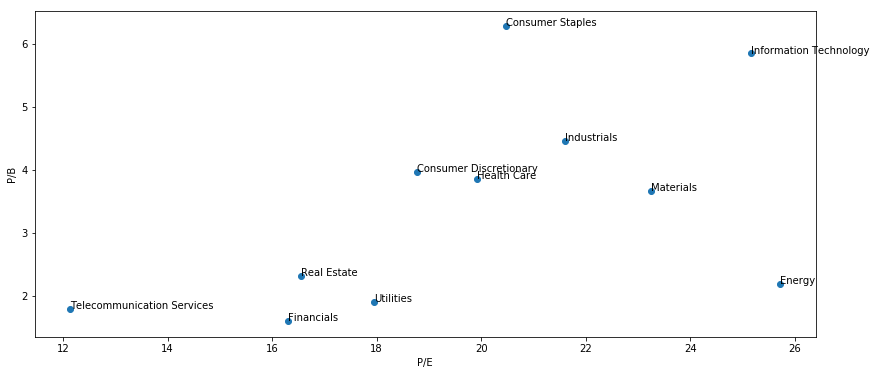

In [77]:

fig, ax = plt.subplots()
#ax.scatter(z, y)
x=df_sector_mean[["Price/Earnings","Price/Book"]].values[:,0]
y=df_sector_mean[["Price/Earnings","Price/Book"]].values[:,1]
ax.scatter(x,y)
plt.xlabel("P/E")
plt.ylabel("P/B")

for i, txt in enumerate(sectors):
    ax.annotate(txt, (x[i], y[i]))


In [149]:
# mean P/E
point1 = df_sector_mean[df_sector_mean.index=="Financials"][["Price/Earnings","Price/Book"]].values[:,0][0]
# mean P/B
point2 = df_sector_mean[df_sector_mean.index=="Financials"][["Price/Earnings","Price/Book"]].values[:,1][0]
print(point1,point2)

16.3 1.6


In [212]:
df_sector_constituents

,Price/Earnings,Price/Book,Market Cap,Name
12,12.24,2.89,10442174371,Affiliated Managers Group Inc
13,12.24,1.53,33422948000,AFLAC Inc
26,13.26,1.67,34759468905,Allstate Corp
34,15.00,3.75,80410990000,American Express Co
35,23.22,0.75,54360073164,"American International Group, Inc."
38,12.41,3.73,23472126000,Ameriprise Financial
48,20.80,6.78,35123123422,Aon plc
56,21.05,2.92,11968488290,Arthur J. Gallagher & Co.
57,33.27,1.12,4653993594,Assurant Inc
66,16.34,1.24,321478200969,Bank of America Corp


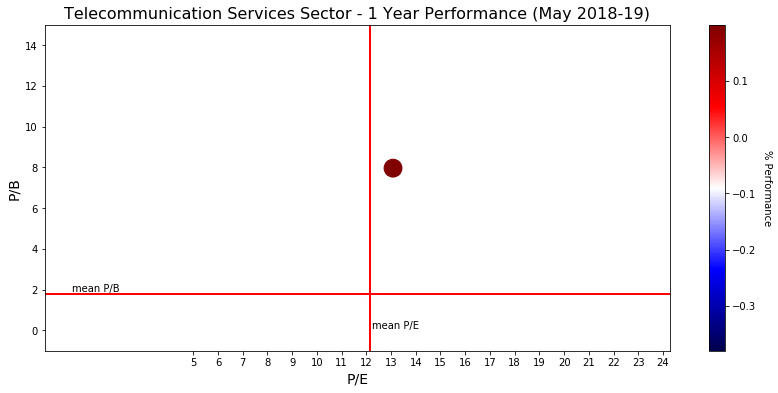

In [539]:
sector = "Telecommunication Services"
df_sector_constituents = data[data["Sector"] == sector][["Price/Earnings","Price/Book","Market Cap"]]
df_sector_constituent_names = data[data["Sector"] == sector][["Symbol","Name", "Price/Earnings","Price/Book","Market Cap","Price"]]

# mean P/E
point1 = df_sector_mean[df_sector_mean.index==sector][["Price/Earnings","Price/Book"]].values[:,0][0]
# mean P/B
point2 = df_sector_mean[df_sector_mean.index==sector][["Price/Earnings","Price/Book"]].values[:,1][0]

# get price changes in %
price_changes = round((df_current_pricing[df_sector_constituent_names.Symbol.values].T -
df_sector_constituent_names[["Price"]].values) / df_sector_constituent_names[["Price"]].values,2)

#price_changes_norm = ((price_changes.values-min(price_changes.values))/(max(price_changes.values)-min(price_changes.values)))#*300
price_changes_norm = list(itertools.chain.from_iterable(price_changes.values))


# market capitalization
MC = df_sector_constituents.values[:,2]
normalized_MC = ((MC-min(MC))/(max(MC)-min(MC)))*350

x = df_sector_constituents.values[:,0]
y = df_sector_constituents.values[:,1]


fig, ax = plt.subplots()
line = ax.scatter(x, y, s=normalized_MC, c=price_changes_norm, cmap='seismic')

cbar = plt.colorbar(line);
cbar.ax.set_ylabel('% Performance', rotation=270)
cbar.ax.get_yaxis().labelpad = 15

ax.axhline(y=point2,linewidth=2, color='r')
ax.text(0.1,point2+0.1,'mean P/B')
ax.axvline(x=point1,linewidth=2, color='r')
ax.text(point1+0.1,0.1,'mean P/E')

ax.set_xlim(-1, point1*2)
ax.set_ylim(-1, 15)


plt.title(sector + " Sector - 1 Year Performance (May 2018-19)", fontsize=16)
plt.xlabel("P/E", fontsize=14)
plt.ylabel("P/B", fontsize=14)
plt.xticks(np.arange(5, point1*2, step=1))


#for i, name in enumerate(df_sector_constituent_names.values):
#    ax.annotate(name[0], (x[i], y[i]))

plt.show()

In [269]:
df_sector_constituents

,Price/Earnings,Price/Book,Market Cap
8,19.54,2.51,8123611867
30,296.16,24.28,685873374731
53,69.74,7.56,24906530300
61,16.31,136.23,19922021415
71,19.22,4.79,20831186176
76,14.15,2.89,11596117445
90,19.44,3.55,11827453706
91,17.48,2.00,49180044050
95,12.05,6.91,20431395736
103,162.92,2.27,86708878113


Consumer Discretionary


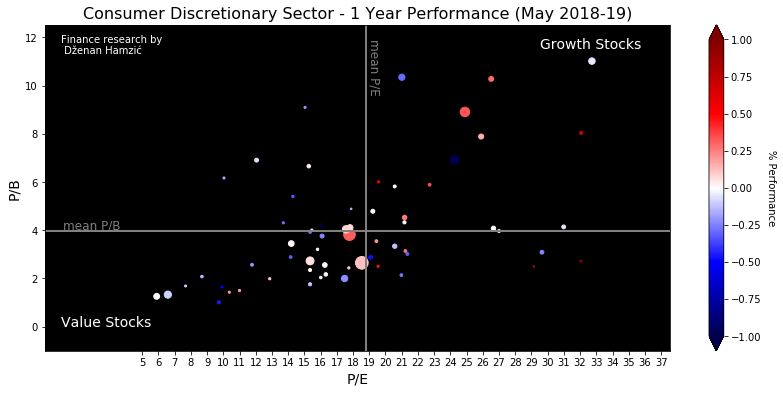

Consumer Staples


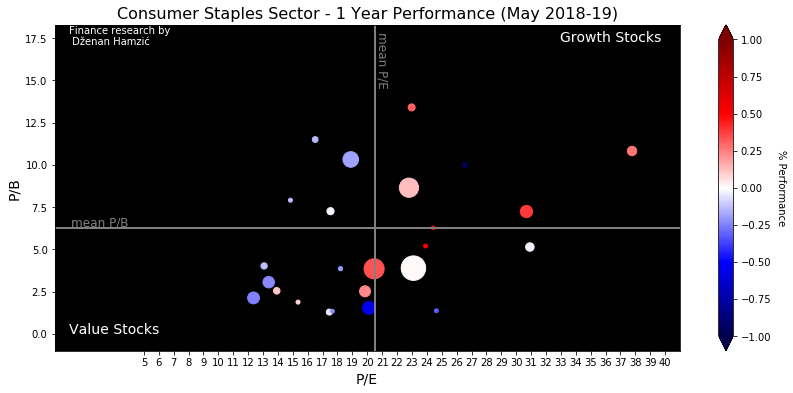

Energy


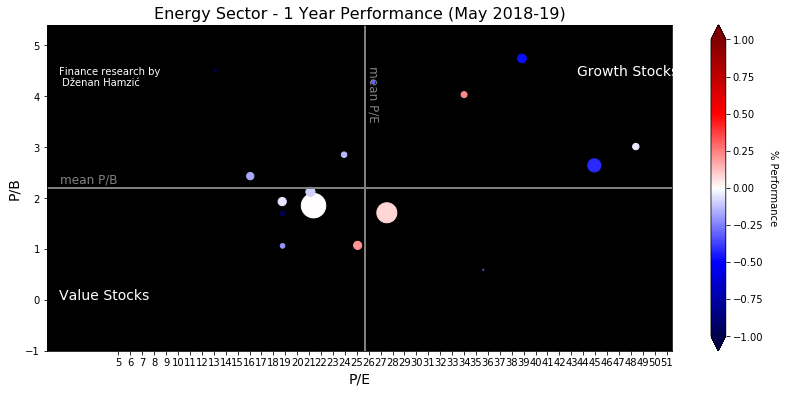

Financials


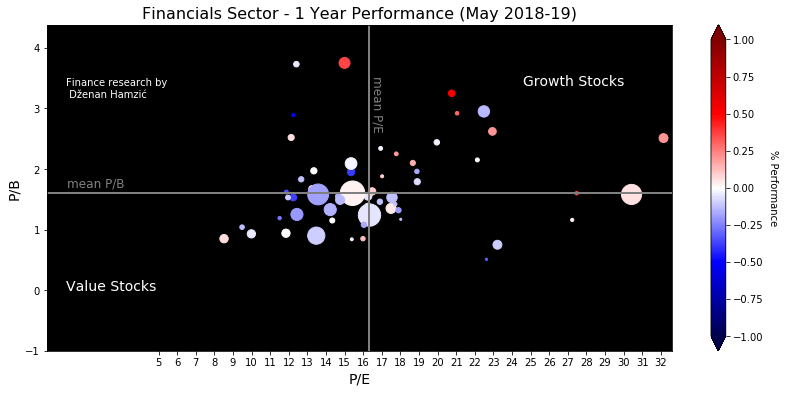

Health Care


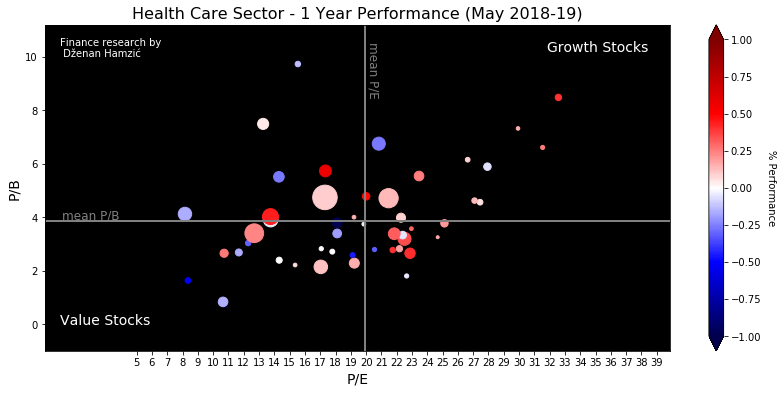

Industrials


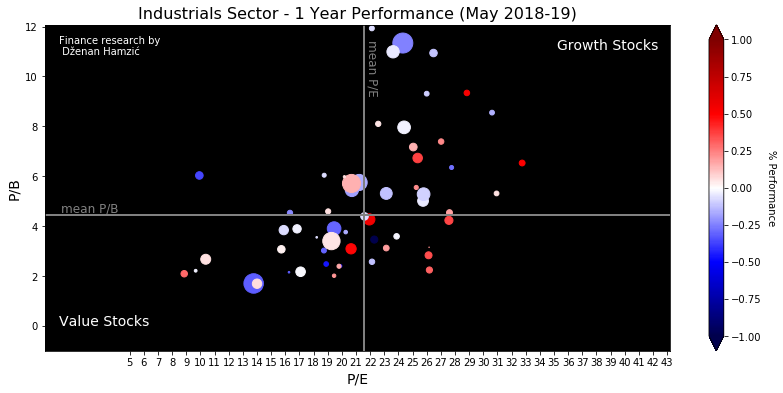

Information Technology


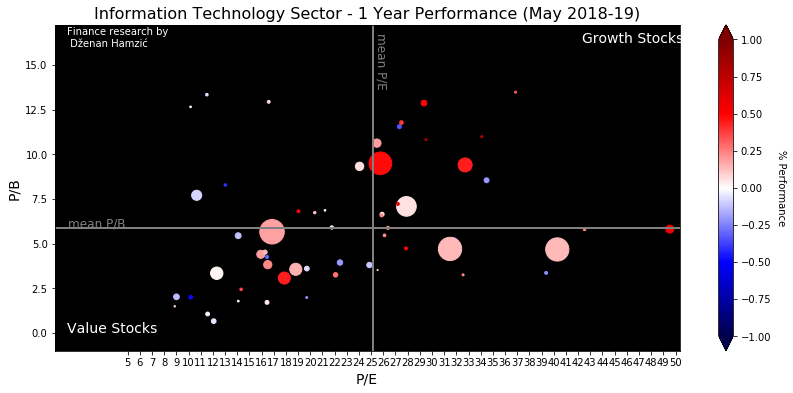

Materials


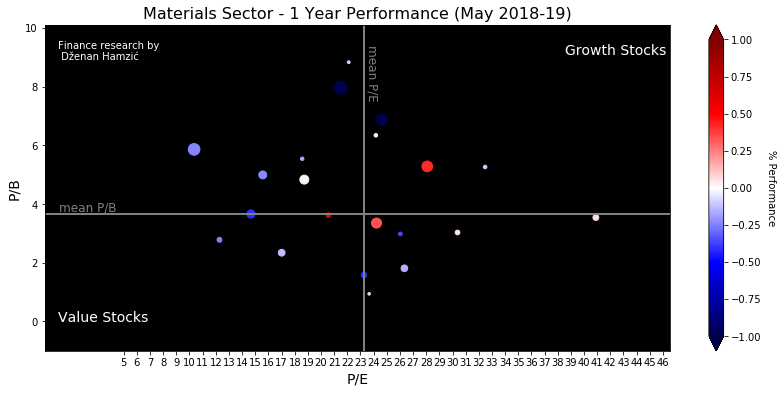

Real Estate


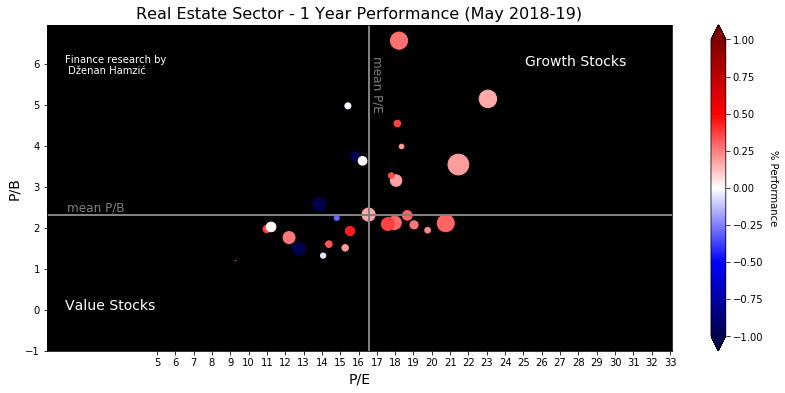

Telecommunication Services


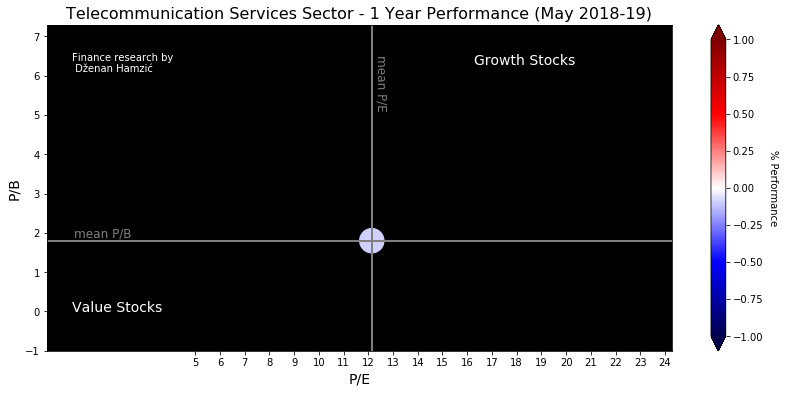

Utilities


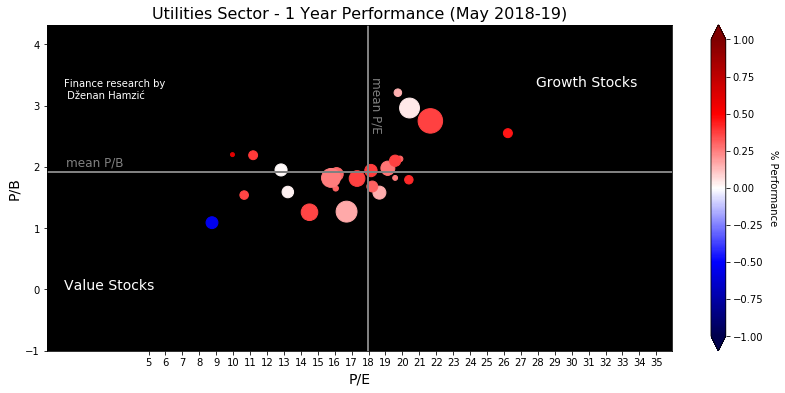

In [639]:
for sector in sectors:
    print(sector)
    df_sector_constituents = data[data["Sector"] == sector][["Price/Earnings","Price/Book","Market Cap"]]
    df_sector_constituent_names = data[data["Sector"] == sector][["Symbol","Name", "Price/Earnings","Price/Book","Market Cap","Price"]]
    
    # mean P/E
    point1 = df_sector_mean[df_sector_mean.index==sector][["Price/Earnings","Price/Book"]].values[:,0][0]
    # mean P/B
    point2 = df_sector_mean[df_sector_mean.index==sector][["Price/Earnings","Price/Book"]].values[:,1][0]
    
    # get price changes in %
    price_changes = round((df_current_pricing[df_sector_constituent_names.Symbol.values].T -
    df_sector_constituent_names[["Price"]].values) / df_sector_constituent_names[["Price"]].values,2)
    
    #price_changes_norm = ((price_changes.values-min(price_changes.values))/(max(price_changes.values)-min(price_changes.values)))#*300
    price_changes_norm = list(itertools.chain.from_iterable(price_changes.values))

    
    # market capitalization
    MC = df_sector_constituents.values[:,2]
    normalized_MC = ((MC-min(MC))/(max(MC)-min(MC)))*600

    x = df_sector_constituents.values[:,0]
    y = df_sector_constituents.values[:,1]

    # plot
    fig, ax = plt.subplots()
    ax.set_facecolor('xkcd:black')
    line = ax.scatter(x, y, s=normalized_MC, c=price_changes_norm, cmap='seismic', vmin=-1, vmax=1)
    
    cbar = plt.colorbar(line, extend='both');
    #cbar.ax.clim(-1, 1);
    cbar.ax.set_ylabel('% Performance', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15
    
    #text
    # Add labels to the plot
    style2 = dict(size=14, color='white')
    ax.text(0, 0, "Value Stocks", **style2)
    ax.text(point1*2-8, point2+np.percentile(y[~np.isnan(y)],80)-1, "Growth Stocks", **style2)
    
    # watermark
    style3 = dict(size=10, color='white')
    ax.text(0, point2+np.percentile(y[~np.isnan(y)],80)-1.2, "Finance research by \n Dženan Hamzić ", **style3)
    
    # axes
    style = dict(size=12, color='gray')
    line_color = "grey"
    ax.axhline(y=point2,linewidth=2, color=line_color)
    ax.text(0.1,point2+0.1,'mean P/B', **style)
    ax.axvline(x=point1,linewidth=2, color=line_color)
    ax.text(point1+0.1,point2+np.percentile(y[~np.isnan(y)],80)-1,'mean P/E',rotation=270, **style)

    ax.set_xlim(-1, point1*2)
    ax.set_ylim(-1, point2+np.percentile(y[~np.isnan(y)],80))

    #plt.xlim(-1, 20)
    #plt.ylim(-1, 8)

    plt.title(sector + " Sector - 1 Year Performance (May 2018-19)", fontsize=16)
    plt.xlabel("P/E", fontsize=14)
    plt.ylabel("P/B", fontsize=14)
    plt.xticks(np.arange(5, point1*2, step=1))


    #for i, name in enumerate(df_sector_constituent_names.values):
    #    ax.annotate(name[0], (x[i], y[i]))

    plt.show()
    fig.savefig("quant-research/"+sector.replace(" ", "_")+".jpg",dpi=500)

Consumer Discretionary


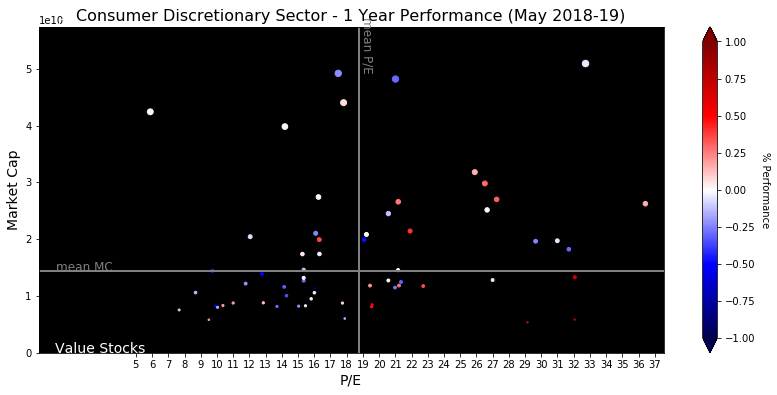

Consumer Staples


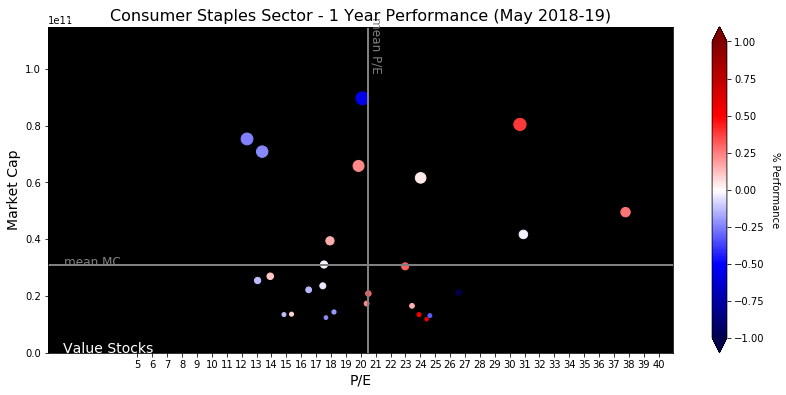

Energy


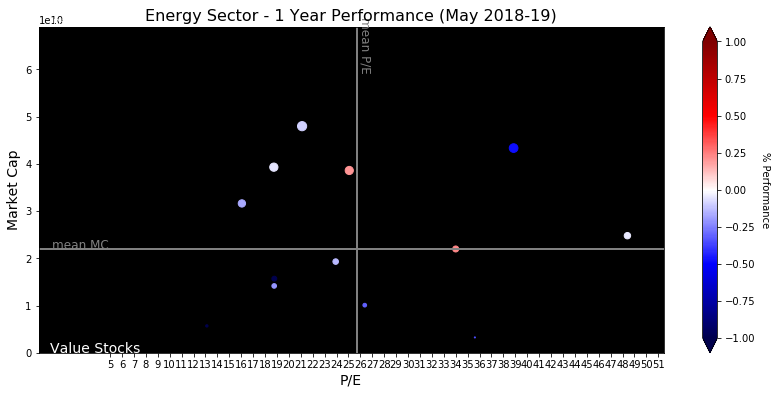

Financials


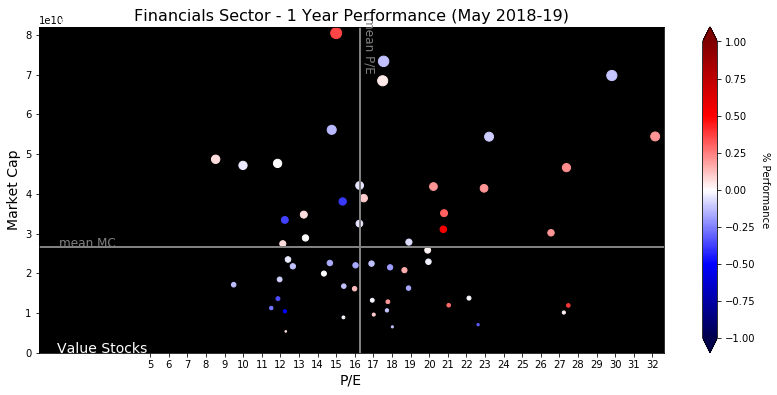

Health Care


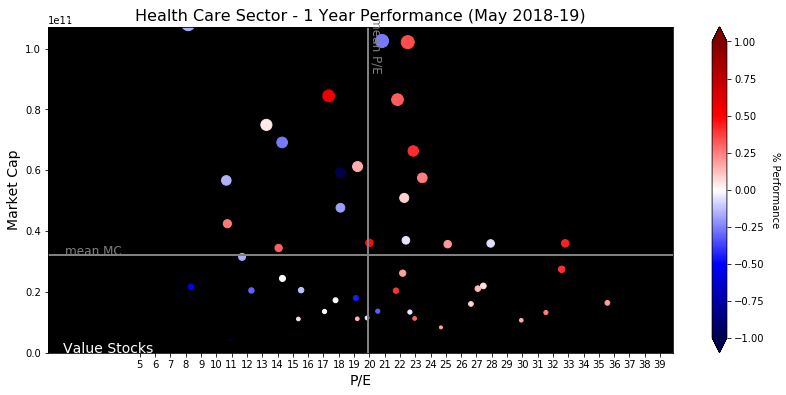

Industrials


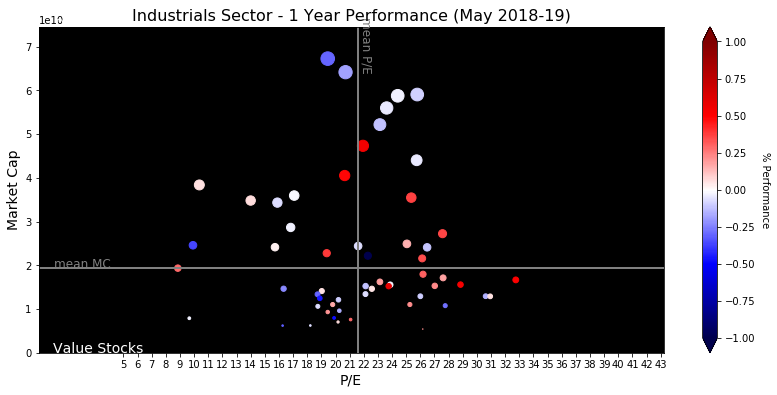

Information Technology


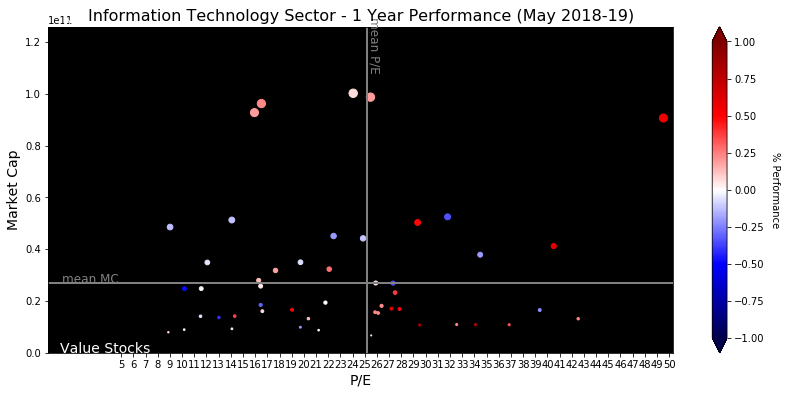

Materials


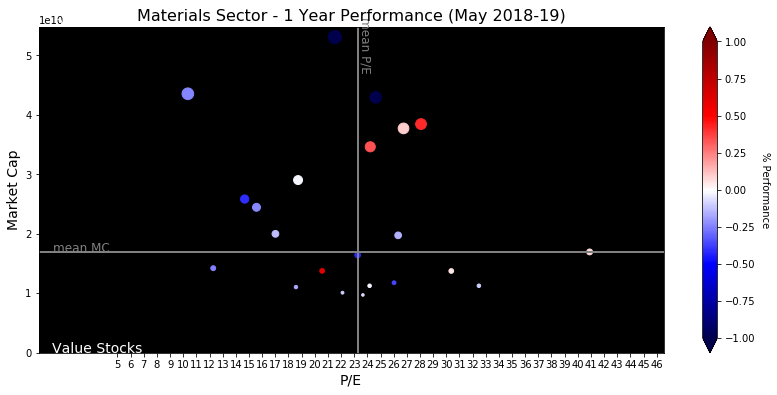

Real Estate


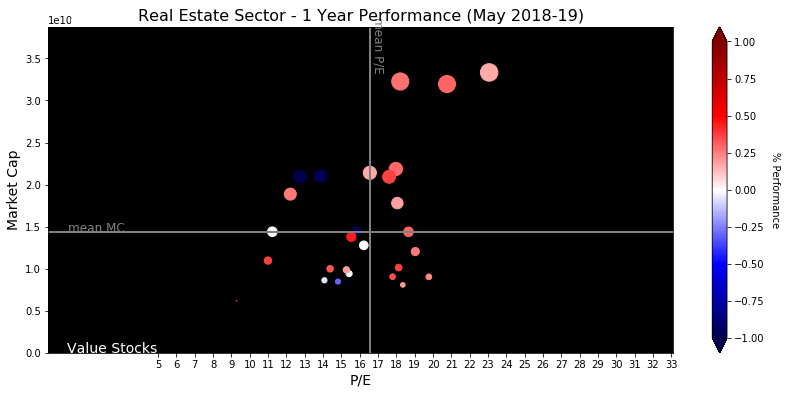

Telecommunication Services


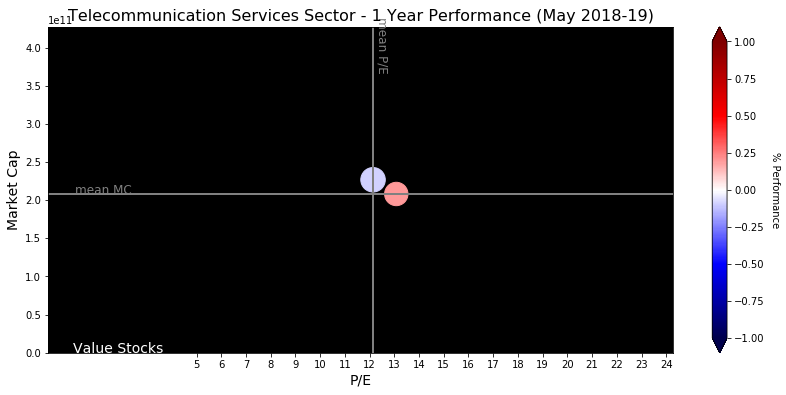

Utilities


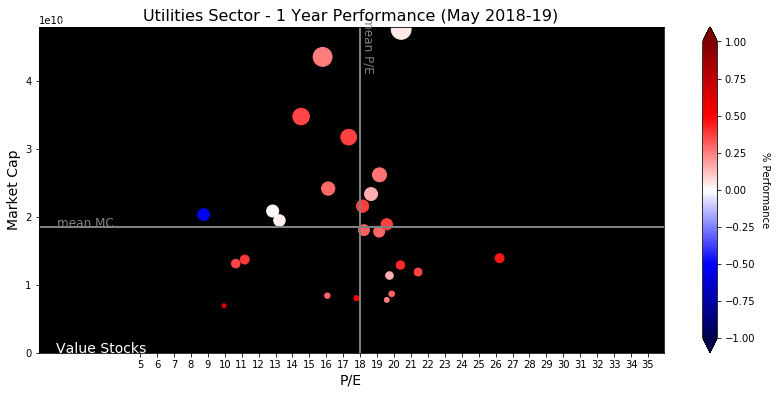

In [640]:
for sector in sectors:
    print(sector)
    df_sector_constituents = data[data["Sector"] == sector][["Price/Earnings","Price/Book","Market Cap"]]
    df_sector_constituent_names = data[data["Sector"] == sector][["Symbol","Name", "Price/Earnings","Price/Book","Market Cap","Price"]]
    
    # mean P/E
    point1 = df_sector_mean[df_sector_mean.index==sector][["Price/Earnings"]].values[:,0][0]
    # mean P/B
    point2 = df_sector_mean[df_sector_mean.index==sector][["Price/Earnings","Market Cap"]].values[:,1][0]
    
    # get price changes in %
    price_changes = round((df_current_pricing[df_sector_constituent_names.Symbol.values].T -
    df_sector_constituent_names[["Price"]].values) / df_sector_constituent_names[["Price"]].values,2)
    
    #price_changes_norm = ((price_changes.values-min(price_changes.values))/(max(price_changes.values)-min(price_changes.values)))#*300
    price_changes_norm = list(itertools.chain.from_iterable(price_changes.values))

    
    # market capitalization
    MC = df_sector_constituents.values[:,2]
    normalized_MC = ((MC-min(MC))/(max(MC)-min(MC)))*600

    x = df_sector_constituents.values[:,0]
    y = df_sector_constituents.values[:,2]

    # plot
    fig, ax = plt.subplots()
    ax.set_facecolor('xkcd:black')
    line = ax.scatter(x, y, s=normalized_MC, c=price_changes_norm, cmap='seismic', vmin=-1, vmax=1)
    
    cbar = plt.colorbar(line, extend='both');
    #cbar.ax.clim(-1, 1);
    cbar.ax.set_ylabel('% Performance', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15
    
    #text
    # Add labels to the plot
    style2 = dict(size=14, color='white')
    ax.text(0, 0, "Value Stocks", **style2)
    ax.text(point1*2-8, point2+np.percentile(y[~np.isnan(y)],80)-1, "Growth Stocks", **style2)
    
    # watermark
    style3 = dict(size=10, color='white')
    ax.text(0, point2+np.percentile(y[~np.isnan(y)],80)-1.2, "Finance research by \n Dženan Hamzić ", **style3)
    
    # axes
    style = dict(size=12, color='gray')
    line_color = "grey"
    ax.axhline(y=point2,linewidth=2, color=line_color)
    ax.text(0.1,point2+0.1,'mean MC', **style)
    ax.axvline(x=point1,linewidth=2, color=line_color)
    ax.text(point1+0.1,point2+np.percentile(y[~np.isnan(y)],80)-1,'mean P/E',rotation=270, **style)

    ax.set_xlim(-1, point1*2)
    ax.set_ylim(-1, point2+np.percentile(y[~np.isnan(y)],80))

    #plt.xlim(-1, 20)
    #plt.ylim(-1, 8)

    plt.title(sector + " Sector - 1 Year Performance (May 2018-19)", fontsize=16)
    plt.xlabel("P/E", fontsize=14)
    plt.ylabel("Market Cap", fontsize=14)
    plt.xticks(np.arange(5, point1*2, step=1))


    #for i, name in enumerate(df_sector_constituent_names.values):
    #    ax.annotate(name[0], (x[i], y[i]))

    plt.show()
    fig.savefig("quant-research/pe-mc-"+sector.replace(" ", "_")+".jpg",dpi=500)

Consumer Discretionary


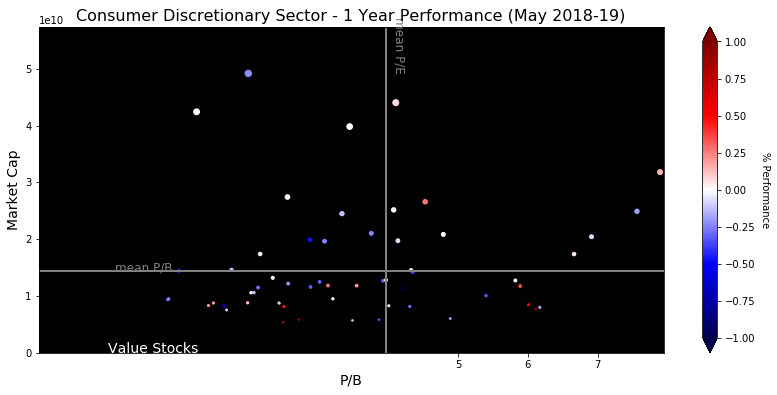

Consumer Staples


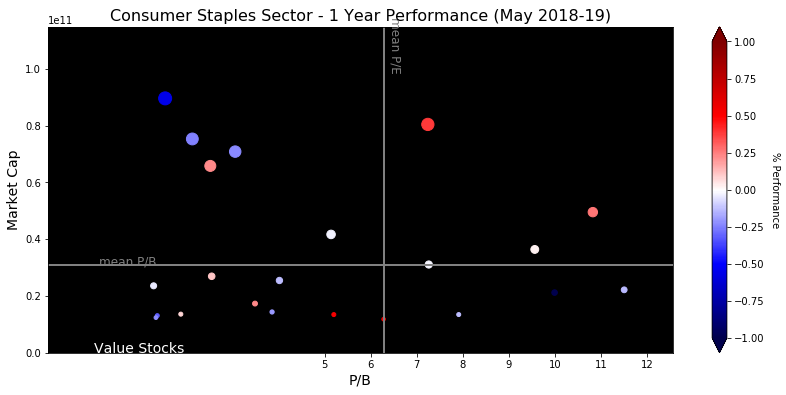

Energy


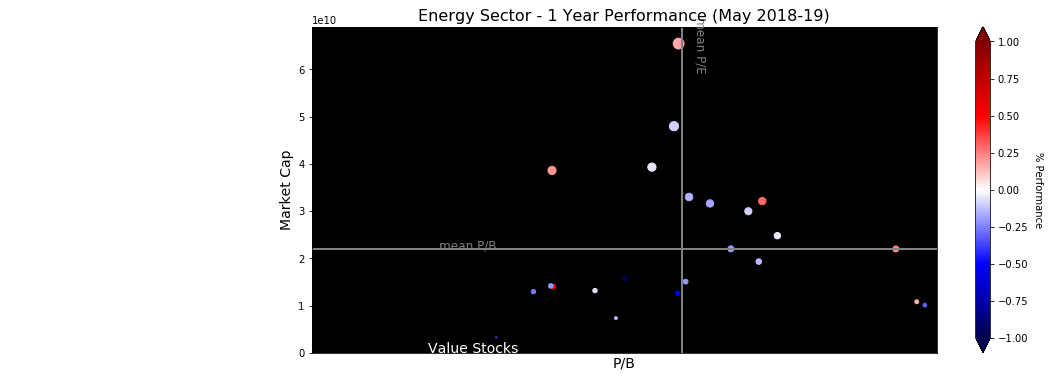

Financials


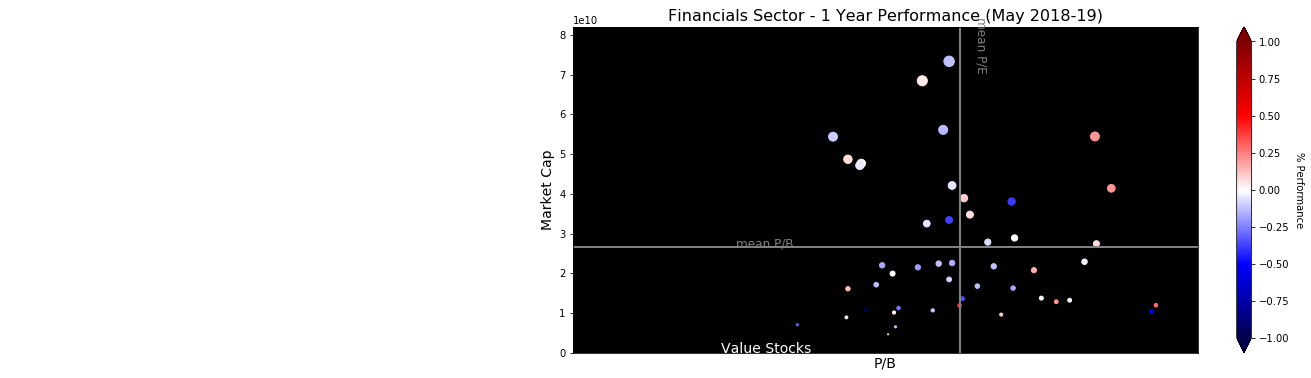

Health Care


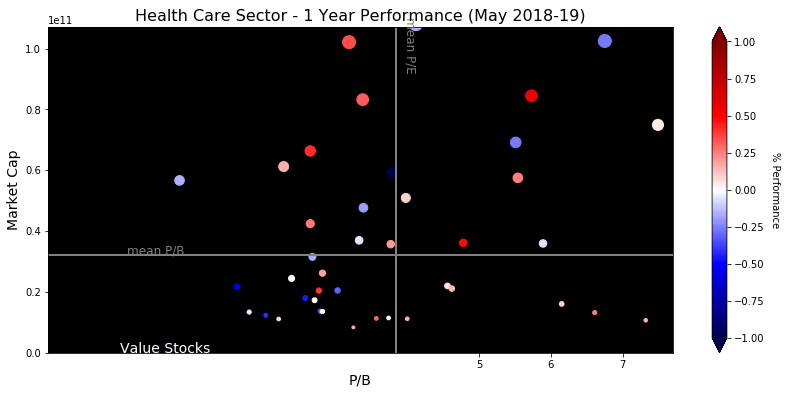

Industrials


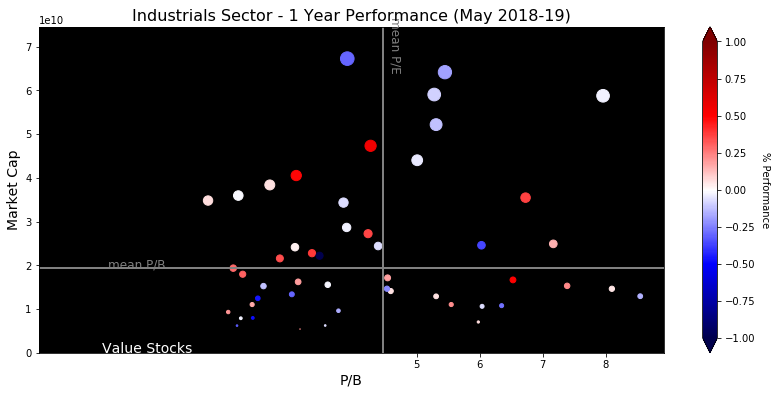

Information Technology


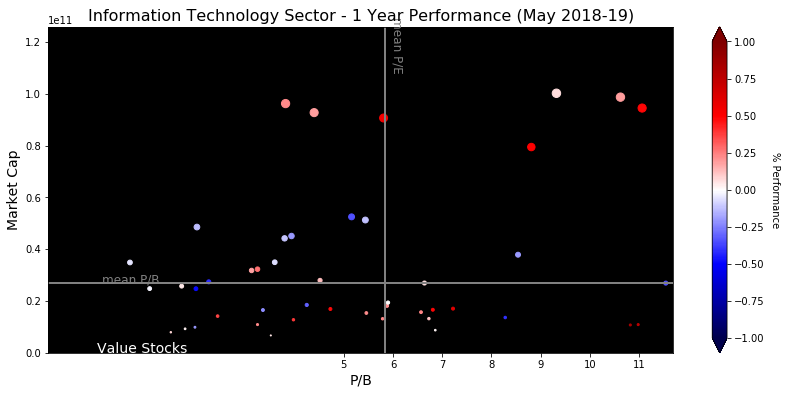

Materials


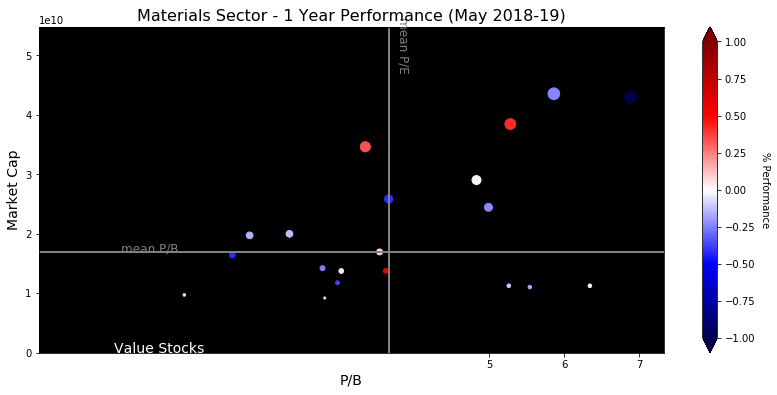

Real Estate


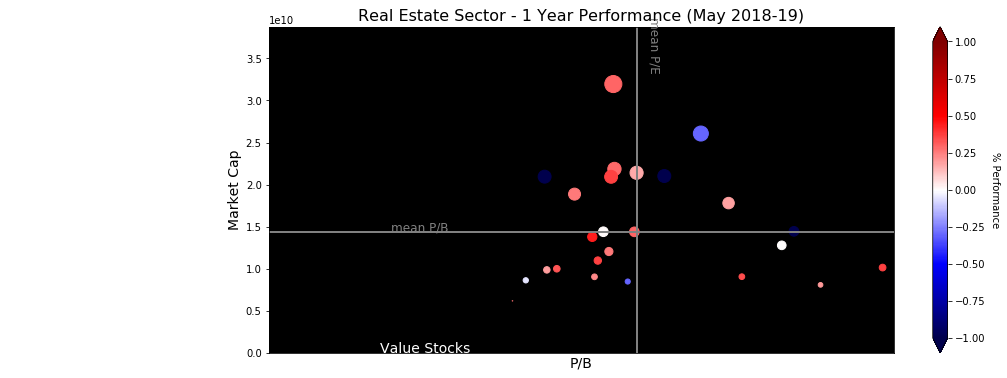

Telecommunication Services


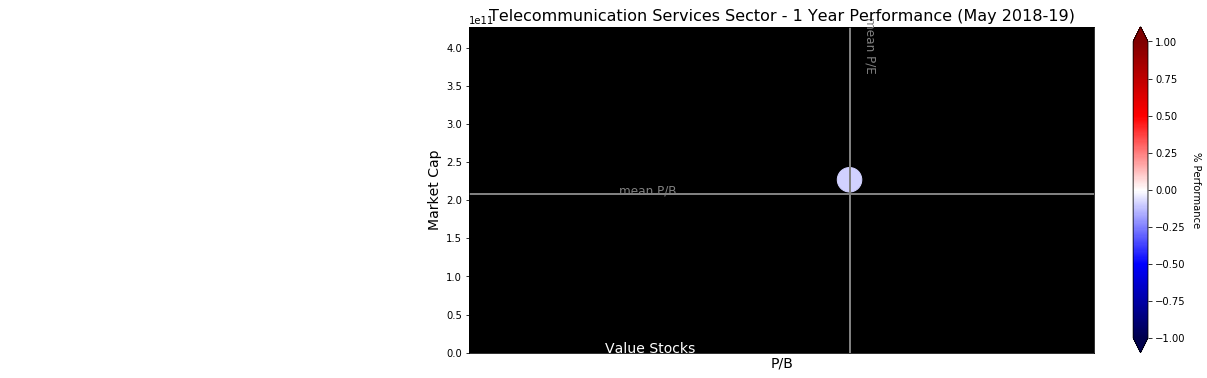

Utilities


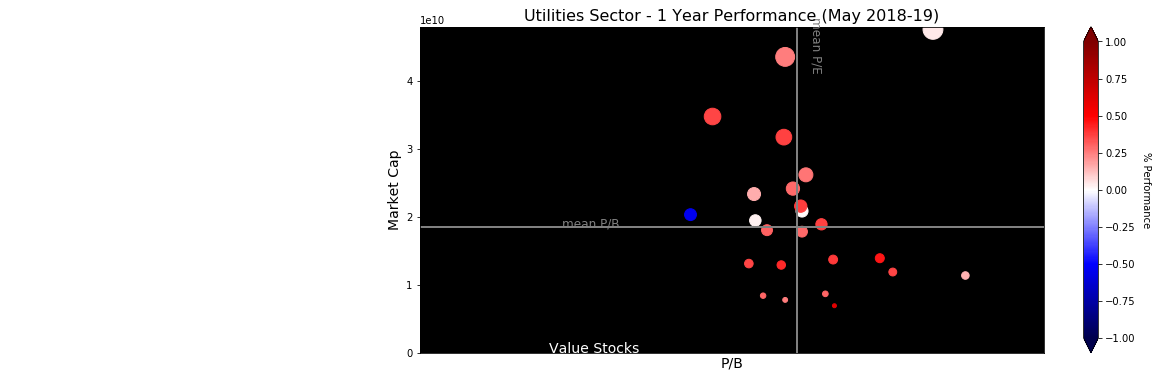

In [641]:
for sector in sectors:
    print(sector)
    df_sector_constituents = data[data["Sector"] == sector][["Price/Earnings","Price/Book","Market Cap"]]
    df_sector_constituent_names = data[data["Sector"] == sector][["Symbol","Name", "Price/Earnings","Price/Book","Market Cap","Price"]]
    
    # mean P/E
    point1 = df_sector_mean[df_sector_mean.index==sector][["Price/Book"]].values[:,0][0]
    # mean P/B
    point2 = df_sector_mean[df_sector_mean.index==sector][["Market Cap"]].values[:,0][0]
    
    # get price changes in %
    price_changes = round((df_current_pricing[df_sector_constituent_names.Symbol.values].T -
    df_sector_constituent_names[["Price"]].values) / df_sector_constituent_names[["Price"]].values,2)
    
    #price_changes_norm = ((price_changes.values-min(price_changes.values))/(max(price_changes.values)-min(price_changes.values)))#*300
    price_changes_norm = list(itertools.chain.from_iterable(price_changes.values))

    
    # market capitalization
    MC = df_sector_constituents.values[:,2]
    normalized_MC = ((MC-min(MC))/(max(MC)-min(MC)))*600

    x = df_sector_constituents.values[:,1]
    y = df_sector_constituents.values[:,2]

    # plot
    fig, ax = plt.subplots()
    ax.set_facecolor('xkcd:black')
    line = ax.scatter(x, y, s=normalized_MC, c=price_changes_norm, cmap='seismic', vmin=-1, vmax=1)
    
    cbar = plt.colorbar(line, extend='both');
    #cbar.ax.clim(-1, 1);
    cbar.ax.set_ylabel('% Performance', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15
    
    #text
    # Add labels to the plot
    style2 = dict(size=14, color='white')
    ax.text(0, 0, "Value Stocks", **style2)
    ax.text(point1*2-8, point2+np.percentile(y[~np.isnan(y)],80)-1, "Growth Stocks", **style2)
    
    # watermark
    style3 = dict(size=10, color='white')
    ax.text(0, point2+np.percentile(y[~np.isnan(y)],80)-1.2, "Finance research by \n Dženan Hamzić ", **style3)
    
    # axes
    style = dict(size=12, color='gray')
    line_color = "grey"
    ax.axhline(y=point2,linewidth=2, color=line_color)
    ax.text(0.1,point2+0.1,'mean P/B', **style)
    ax.axvline(x=point1,linewidth=2, color=line_color)
    ax.text(point1+0.1,point2+np.percentile(y[~np.isnan(y)],80)-1,'mean P/E',rotation=270, **style)

    ax.set_xlim(-1, point1*2)
    ax.set_ylim(-1, point2+np.percentile(y[~np.isnan(y)],80))

    #plt.xlim(-1, 20)
    #plt.ylim(-1, 8)

    plt.title(sector + " Sector - 1 Year Performance (May 2018-19)", fontsize=16)
    plt.xlabel("P/B", fontsize=14)
    plt.ylabel("Market Cap", fontsize=14)
    plt.xticks(np.arange(5, point1*2, step=1))


    #for i, name in enumerate(df_sector_constituent_names.values):
    #    ax.annotate(name[0], (x[i], y[i]))

    plt.show()
    fig.savefig("quant-research/pb-mc-"+sector.replace(" ", "_")+".jpg",dpi=500)

### Get current stock prices (should be above)

In [440]:
symbols = data["Symbol"].values#["MMM","AOS","ABT"]#

current_pricing = {}
for sym in symbols:
    price = 0
    price = get_current_stock_price(sym)
    print(sym, price)
    current_pricing[sym] = price
    time.sleep(2)

MMM 166.38
AOS 43.225
ABT 75.78
ABBV 79.895
ACN 178.53
ATVI 43.645
AYI 134.86
ADBE 275.71
AAP 158.59
AMD 26.76
AES 16.23
Failed to download:nInvalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY_ADJUSTED.
AET -1
AMG 88.69
AFL 52.14
A 69.02
APD 205.42
AKAM 76.945
ALK 62.0
ALB 67.82
ARE 144.58
ALXN 127.53
ALGN 319.67
ALLE 99.95
AGN 138.925
ADS 143.22
LNT 48.21
ALL 96.015
GOOGL 1145.82
GOOG 1140.3499
MO 52.33
AMZN 1859.5
AEE 74.71
AAL 30.99
AEP 86.635
AXP 119.82
AIG 52.51
AMT 198.43
AWK 111.3
AMP 145.79
ABC 79.4
AME 85.17
AMGN 168.675
APH 89.78
APC 72.74
ADI 97.46
Failed to download:nInvalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY_ADJUSTED.
ANDV -1
ANSS 184.81
ANTM 266.53
AON 178.54
APA 29.9
AIV 49.58
AAPL 183.1
AMAT 40.305
APTV 72.82
ADM 39.84
ARNC 22.02
AJG 83.28
AIZ 96.0
T 32.24
ADSK 170.62
ADP 161.54
AZO 977.57
AVB 200.36
AVY 100.06
BHGE 2

In [559]:
df_current_pricing = pd.DataFrame.from_dict(current_pricing,orient='index').T
df_current_pricing

,PFG,SYY,CTAS,HAL,QRVO,TJX,BSX,ETR,PYPL,CHK,...,MNST,MAA,NLSN,AEP,AIZ,SRCL,FCX,TRV,LOW,HPQ
0,54.87,74.94,223.38,25.09,61.27,52.97,37.325,97.92,112.15,2.305,...,63.61,113.63,23.7,86.635,96.0,48.05,10.2,148.18,109.22,18.95
